# Second Dataset from Kaggle
https://www.kaggle.com/karrrimba/movie-metadatacsv 

## Importing necessary libraries and reading the data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ast import literal_eval
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

df=pd.read_csv('movies_metadata.csv')
df.head()


C:\Python\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
adult                    45466 non-null object
belongs_to_collection    4494 non-null object
budget                   45466 non-null object
genres                   45466 non-null object
homepage                 7782 non-null object
id                       45466 non-null object
imdb_id                  45449 non-null object
original_language        45455 non-null object
original_title           45466 non-null object
overview                 44512 non-null object
popularity               45461 non-null object
poster_path              45080 non-null object
production_companies     45463 non-null object
production_countries     45463 non-null object
release_date             45379 non-null object
revenue                  45460 non-null float64
runtime                  45203 non-null float64
spoken_languages         45460 non-null object
status                   45379 non-null objec

In [3]:
print("There are {} observations and {} features in this dataset. \n".format(df.shape[0],df.shape[1]))

There are 45466 observations and 24 features in this dataset. 



### Information about Features

* **adult:** Indicates if the movie is X-Rated or Adult.
* **belongs_to_collection:** A stringified dictionary that gives information on the movie series the particular film belongs to.
* **budget:** The budget of the movie in dollars.
* **genres:** A stringified list of dictionaries that list out all the genres associated with the movie.
* **homepage:** The Official Homepage of the move.
* **id:** The ID of the move.
* **imdb_id:** The IMDB ID of the movie.
* **original_language:** The language in which the movie was originally shot in.
* **original_title:** The original title of the movie.
* **overview:** A brief blurb of the movie.
* **popularity:** The Popularity Score assigned by TMDB.
* **poster_path:** The URL of the poster image.
* **production_companies:** A stringified list of production companies involved with the making of the movie.
* **production_countries:** A stringified list of countries where the movie was shot/produced in.
* **release_date:** Theatrical Release Date of the movie.
* **revenue:** The total revenue of the movie in dollars.
* **runtime:** The runtime of the movie in minutes.
* **spoken_languages:** A stringified list of spoken languages in the film.
* **status:** The status of the movie (Released, To Be Released, Announced, etc.)
* **tagline:** The tagline of the movie.
* **title:** The Official Title of the movie.
* **video:** Indicates if there is a video present of the movie with TMDB.
* **vote_average:** The average rating of the movie.
* **vote_count:** The number of votes by users, as counted by TMDB.

# Data Cleaning

 For cleaning the data, I started with:
- dropping the duplicate rows. (13 duplicates)
- Just kept the rows wih False and True in adult column.
- I dropped the columns 'status','adult','homepage','imdb_id','original_title','poster_path','tagline','video','spoken_languages', since they are not providing important information for this project

- The ‘budget’ and ‘popularity’ columns have been changed to numeric.

- The ‘release_date’ has been changed to datetime format.

- ‘year’ column is added for future use.

- I used the literal_eval, apply and lambda to  change the format of ‘production_companies’, ‘genres’, and ‘production_countries’ columns.

In [4]:
df.drop_duplicates(inplace=True)

df=df[(df.adult=='False')|(df.adult=='True')]

df.drop(['status','adult','homepage','imdb_id',
          'original_title','poster_path','tagline','video','spoken_languages'],axis=1,inplace=True)#drop unnecessary columns

df['budget']=pd.to_numeric(df['budget'])
df['popularity']=pd.to_numeric(df['popularity'])
df=df[df.popularity.notnull()]

df['release_date']=pd.to_datetime(df['release_date'])
df['year']=df['release_date'].dt.year

df['production_companies']=df.production_companies.fillna('[]').apply(literal_eval).apply(lambda x: [i['name'] for i in x]if isinstance(x, list) else [])
df['genres']=df.genres.fillna('[]').apply(literal_eval).apply(lambda x: [i['name'] for i in x]if isinstance(x, list) else [])
df['production_countries']=df.production_countries.fillna('[]').apply(literal_eval).apply(lambda x: [i['name'] for i in x]if isinstance(x, list) else [])
#df['belongs_to_collection']=df.belongs_to_collection.fillna('[]').apply(literal_eval).apply(lambda x: [i['name'] for i in x]if isinstance(x, list) else [])
df['return'] = df['revenue'] / df['budget']
df.head()

,belongs_to_collection,budget,genres,id,original_language,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,title,vote_average,vote_count,year,return
0,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[Animation, Comedy, Family]",862,en,"Led by Woody, Andy's toys live happily in his ...",21.946943,[Pixar Animation Studios],[United States of America],1995-10-30,373554033.0,81.0,Toy Story,7.7,5415.0,1995.0,12.451801
1,NaN,65000000,"[Adventure, Fantasy, Family]",8844,en,When siblings Judy and Peter discover an encha...,17.015539,"[TriStar Pictures, Teitler Film, Interscope Co...",[United States of America],1995-12-15,262797249.0,104.0,Jumanji,6.9,2413.0,1995.0,4.043035
2,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[Romance, Comedy]",15602,en,A family wedding reignites the ancient feud be...,11.712900,"[Warner Bros., Lancaster Gate]",[United States of America],1995-12-22,0.0,101.0,Grumpier Old Men,6.5,92.0,1995.0,NaN
3,NaN,16000000,"[Comedy, Drama, Romance]",31357,en,"Cheated on, mistreated and stepped on, the wom...",3.859495,[Twentieth Century Fox Film Corporation],[United States of America],1995-12-22,81452156.0,127.0,Waiting to Exhale,6.1,34.0,1995.0,5.090760
4,"{'id': 96871, 'name': 'Father of the Bride Col...",0,[Comedy],11862,en,Just when George Banks has recovered from his ...,8.387519,"[Sandollar Productions, Touchstone Pictures]",[United States of America],1995-02-10,76578911.0,106.0,Father of the Bride Part II,5.7,173.0,1995.0,inf


**Drop duplicated rows**

In [5]:
print("There are {} observations and {} features in this dataset. \n".format(df.shape[0],df.shape[1]))
print('Unique IDs: ', df.id.nunique())
print('Unique movies: ',df.title.nunique())
df=df.drop(df[df[['title','year','release_date']].duplicated(keep='first')].sort_values(by='title').index,axis=0)
df.shape 

There are 45447 observations and 17 features in this dataset. 

Unique IDs:  45430
Unique movies:  42277


(45430, 17)

## Exploratory Data Analysis (Story telling)

**Total number of movies of each genre**

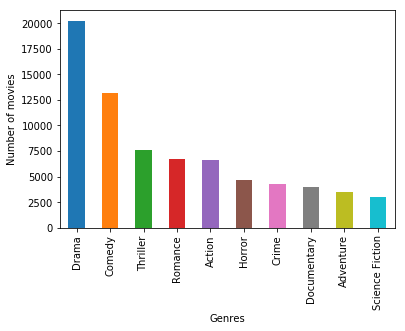

In [6]:
Genres=df.genres
Genres=Genres.apply(pd.Series).stack(level=-1,dropna=True)
Genres.value_counts().head(10).plot(kind='bar')
plt.xlabel('Genres')
plt.ylabel('Number of movies')
plt.show()

### Production countries


In [7]:
mask = df.production_countries.apply(lambda x: 'United States of America' in x)
print('USA total number of production is:',sum(mask))

USA total number of production is: 21140


_Some movies have more than one production country. I am using stack function to get the right count value production of each country_

In [8]:
Countries=df.production_countries
Countries=Countries.apply(pd.Series).stack(level=-1,dropna=True)
Countries.value_counts().head(10)

United States of America    21140
United Kingdom               4091
France                       3932
Germany                      2249
Italy                        2166
Canada                       1765
Japan                        1645
Spain                         964
Russia                        912
India                         827
dtype: int64

To get a better bar plot, I have ignored USA from the list, since USA has produced 5 times more than United Kingdom.

After USA, __UK, France and Germany__ have the highest number of production.

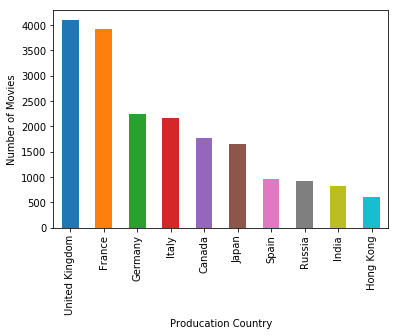

In [9]:
Countries.value_counts()[1:11].plot(kind='bar') #Ignore USA
plt.xlabel('Producation Country')
plt.ylabel('Number of Movies')
plt.show()

#### Average revenue of US, UK, and France

In [10]:
Countries=df[['production_countries','revenue']]
USA=df.loc[df.production_countries.apply(lambda x: 'United States of America' in x),'revenue']
UK=df.loc[df.production_countries.apply(lambda x: 'United Kingdom' in x),'revenue',]
France=df.loc[df.production_countries.apply(lambda x: 'France' in x),'revenue']

print('USA avg revenue is:' ,USA.mean())
print('UK avg revenue is: ',UK.mean())
print('France avg revenue is: ',France.mean())

USA avg revenue is: 22534331.03935667
UK avg revenue is:  17949958.819848448
France avg revenue is:  5156112.683621567


### Production companies

Since some movies have more than one producation company, I used stack function to get the right value counts of each company.

__Warner Bros., Metro-Goldwyn-Mayer (MGM)__, and __Paramount Pictures__ have the highest number of production.

In [11]:
Companies=df['production_companies']
Companies=Companies.apply(pd.Series).stack(level=-1,dropna=True)
Companies.value_counts().head(10)

Warner Bros.                              1250
Metro-Goldwyn-Mayer (MGM)                 1074
Paramount Pictures                        1001
Twentieth Century Fox Film Corporation     836
Universal Pictures                         830
Columbia Pictures Corporation              448
Canal+                                     436
Columbia Pictures                          431
RKO Radio Pictures                         290
United Artists                             279
dtype: int64

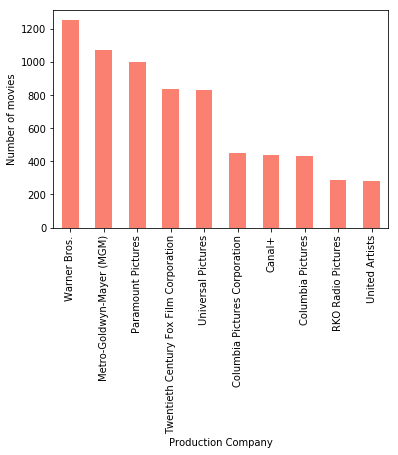

In [12]:
Companies.value_counts().head(10).plot(kind='bar',color='salmon')
plt.xlabel('Production Company')
plt.ylabel('Number of movies')
plt.show()

### Highest Earning Production Companies
Lets find out which production companies have earned the most money from the movie making business.
__Warner Bros., Universal Pircure__, and __Paramount Pictures__ have the highest total revenue respectively.


In [13]:
s = df.apply(lambda x: pd.Series(x['production_companies']),axis=1).stack().reset_index(level=1, drop=True)
s.name = 'companies'
com_df = df.drop('production_companies', axis=1).join(s)
com_sum = pd.DataFrame(com_df.groupby('companies')['revenue'].sum().sort_values(ascending=False))
com_sum.columns = ['Total']
com_mean = pd.DataFrame(com_df.groupby('companies')['revenue'].mean().sort_values(ascending=False))
com_mean.columns = ['Average']
com_count = pd.DataFrame(com_df.groupby('companies')['revenue'].count().sort_values(ascending=False))
com_count.columns = ['Number']

com_pivot = pd.concat((com_sum, com_mean, com_count), axis=1)
com_pivot.sort_values('Total', ascending=False).head(10)

C:\Python\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  # This is added back by InteractiveShellApp.init_path()


,Total,Average,Number
Warner Bros.,6.352519e+10,5.082015e+07,1250
Universal Pictures,5.525919e+10,6.657734e+07,830
Paramount Pictures,4.876940e+10,4.872068e+07,1001
Twentieth Century Fox Film Corporation,4.768775e+10,5.704276e+07,836
Walt Disney Pictures,4.083727e+10,1.552748e+08,263
Columbia Pictures,3.227974e+10,7.489498e+07,431
New Line Cinema,2.217339e+10,8.004834e+07,277
Amblin Entertainment,1.734372e+10,2.282068e+08,76
DreamWorks SKG,1.547575e+10,1.629027e+08,95
Dune Entertainment,1.500379e+10,2.308275e+08,65


 From the companies with higher prodcution number of 500, **Universal Pictures**, **Twentieth Century Fox Film Corporation**, and __Warner Bros__. have the highest average revenue respectively.

In [14]:
com_pivot[com_pivot.Number>=500].sort_values('Average', ascending=False).head(10)

,Total,Average,Number
Universal Pictures,5.525919e+10,6.657734e+07,830
Twentieth Century Fox Film Corporation,4.768775e+10,5.704276e+07,836
Warner Bros.,6.352519e+10,5.082015e+07,1250
Paramount Pictures,4.876940e+10,4.872068e+07,1001
Metro-Goldwyn-Mayer (MGM),1.237679e+10,1.152401e+07,1074


*Just check how many movies have higher, lower and equal budget than revenus.*

In [15]:
print('Movies with higher revenue than budget:',sum((df['revenue']-df['budget'])>0))  
print('Movies with lower revenue than budget:',sum((df['revenue']-df['budget'])<0)) 
print('movies with equal revenue than budget:',sum((df['revenue']-df['budget'])==0))

Movies with higher revenue than budget: 5775
Movies with lower revenue than budget: 5108
movies with equal revenue than budget: 34547


### Revenue

* **Avator, Star wars: The force awakens**, and **Titanic** are the moview with the max revenue. 

In [16]:
df.sort_values(by='revenue',ascending=False).head(10)['title']

14551                                          Avatar
26555                    Star Wars: The Force Awakens
1639                                          Titanic
17818                                    The Avengers
25084                                  Jurassic World
28830                                       Furious 7
26558                         Avengers: Age of Ultron
17437    Harry Potter and the Deathly Hallows: Part 2
22110                                          Frozen
42222                            Beauty and the Beast
Name: title, dtype: object

*Some movies with vote_averge of 10 is presented bellow. 190 movies have the vote_average of 10.*

In [17]:
df.sort_values(by='vote_average',ascending=False).head(10)[['title','vote_average']]

,title,vote_average
41646,Big Jay Oakerson: Live at Webster Hall,10.0
33389,The Italian Key,10.0
11385,Joe Cocker - Mad Dogs & Englishmen,10.0
41879,Panorama of Esplanade by Night,10.0
22395,Marvin Hamlisch: What He Did For Love,10.0
22396,Meat the Truth,10.0
11050,Blessed Event,10.0
33627,Mad As Hell,10.0
22578,Eggshells,10.0
42136,The Black Sheep of Whitehall,10.0


*The movies with highest revenue do not have the highest popularity and vote_average. Though the total number of votes for each movie is important.*

In [18]:
df.sort_values(by='revenue',ascending=False).head(10)[['title','popularity','vote_average','revenue']]#10 highest revenue

,title,popularity,vote_average,revenue
14551,Avatar,185.070892,7.2,2.787965e+09
26555,Star Wars: The Force Awakens,31.626013,7.5,2.068224e+09
1639,Titanic,26.889070,7.5,1.845034e+09
17818,The Avengers,89.887648,7.4,1.519558e+09
25084,Jurassic World,32.790475,6.5,1.513529e+09
28830,Furious 7,27.275687,7.3,1.506249e+09
26558,Avengers: Age of Ultron,37.379420,7.3,1.405404e+09
17437,Harry Potter and the Deathly Hallows: Part 2,24.990737,7.9,1.342000e+09
22110,Frozen,24.248243,7.3,1.274219e+09
42222,Beauty and the Beast,287.253654,6.8,1.262886e+09


_The most voted movies are **Inception, The Dark Knight**, and **Avatar**._

In [19]:
df[['title', 'vote_count', 'year']].sort_values('vote_count', ascending=False).head(10)

,title,vote_count,year
15480,Inception,14075.0,2010.0
12481,The Dark Knight,12269.0,2008.0
14551,Avatar,12114.0,2009.0
17818,The Avengers,12000.0,2012.0
26564,Deadpool,11444.0,2016.0
22879,Interstellar,11187.0,2014.0
20051,Django Unchained,10297.0,2012.0
23753,Guardians of the Galaxy,10014.0,2014.0
2843,Fight Club,9678.0,1999.0
18244,The Hunger Games,9634.0,2012.0


### Most popular
**The first three most popular movies are Minions, Wonder Woman, and Beauty and the beast.**



The Popularity score seems to be an extremely skewed quentity with a mean of only 2.9 but maximum values reaching as high as 547, which is almost 1800% greater than the mean. However, as can be seen from the distribution plot, almost all movies have a popularity score less than 10 (the 75th percentile is at 3.678902).

In [20]:
df.sort_values(by='popularity',ascending=False).head(10)[['title','popularity','vote_average','revenue']] #10 most popular

,title,popularity,vote_average,revenue
30700,Minions,547.488298,6.4,1.156731e+09
33356,Wonder Woman,294.337037,7.2,8.205804e+08
42222,Beauty and the Beast,287.253654,6.8,1.262886e+09
43644,Baby Driver,228.032744,7.2,2.245113e+08
24455,Big Hero 6,213.849907,7.8,6.521054e+08
26564,Deadpool,187.860492,7.4,7.831130e+08
26566,Guardians of the Galaxy Vol. 2,185.330992,7.6,8.634161e+08
14551,Avatar,185.070892,7.2,2.787965e+09
24351,John Wick,183.870374,7.0,8.876166e+07
23675,Gone Girl,154.801009,7.9,3.693304e+08


*Movies with more than 2000 votes and highesr vote average are listed bellow.*

__The Shawshank Redemption, Godfather__, and __Life is beautiful__ are the first three in this list.

In [21]:
df[df['vote_count'] > 2000][['title', 'vote_average', 'vote_count' ,'year']].sort_values('vote_average', ascending=False).head(10)

,title,vote_average,vote_count,year
314,The Shawshank Redemption,8.5,8358.0,1994.0
834,The Godfather,8.5,6024.0,1972.0
2211,Life Is Beautiful,8.3,3643.0,1997.0
5481,Spirited Away,8.3,3968.0,2001.0
1152,One Flew Over the Cuckoo's Nest,8.3,3001.0,1975.0
1176,Psycho,8.3,2405.0,1960.0
2843,Fight Club,8.3,9678.0,1999.0
1178,The Godfather: Part II,8.3,3418.0,1974.0
12481,The Dark Knight,8.3,12269.0,2008.0
292,Pulp Fiction,8.3,8670.0,1994.0


### Release time
Plotting the total number of movies produced each year.

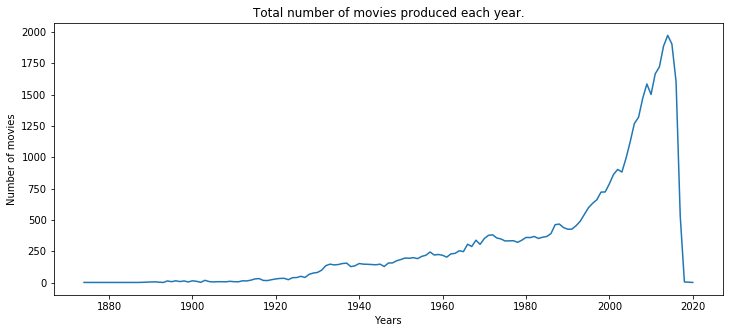

In [22]:
plt.figure(figsize=(12,5))
df['release_date']=pd.to_datetime(df['release_date'])
df['release_date'].dt.year.value_counts().sort_index().plot()
plt.xlabel('Years')
plt.ylabel('Number of movies')
plt.title('Total number of movies produced each year.')
plt.show()


*Total number of movies release each month. (Most movies release in **January**)*

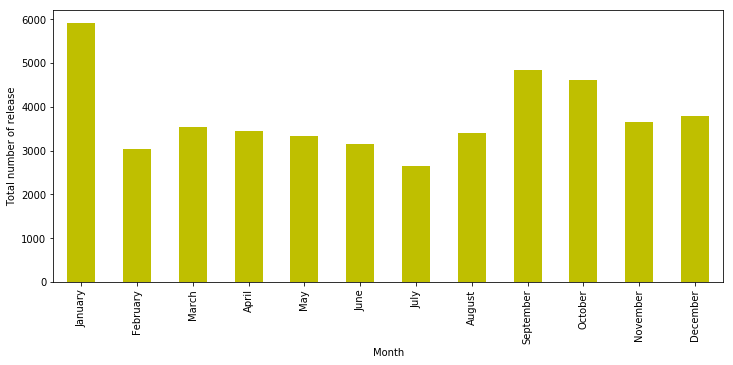

In [23]:
plt.figure(figsize=(12,5))
df['release_date'].dt.month.value_counts().sort_index().plot.bar( color='y')
plt.xlabel('Month')
plt.xticks(np.arange(12),('January', 'February', 'March', 'April', 'May', 'June', 'July',
              'August', 'September', 'October', 'November', 'December'))
plt.ylabel('Total number of release')
plt.show()

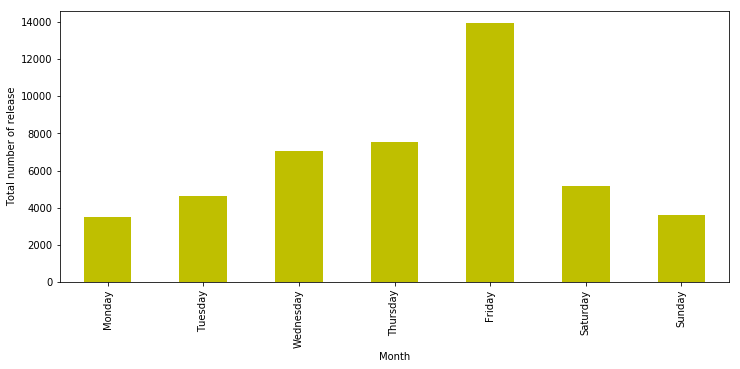

In [24]:
plt.figure(figsize=(12,5))
df['release_date'].dt.weekday.value_counts().sort_index().plot.bar( color='y')
plt.xlabel('Month')
plt.xticks(np.arange(7),('Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'))
plt.ylabel('Total number of release')
plt.show()

*Most movies release on first day of each month.*

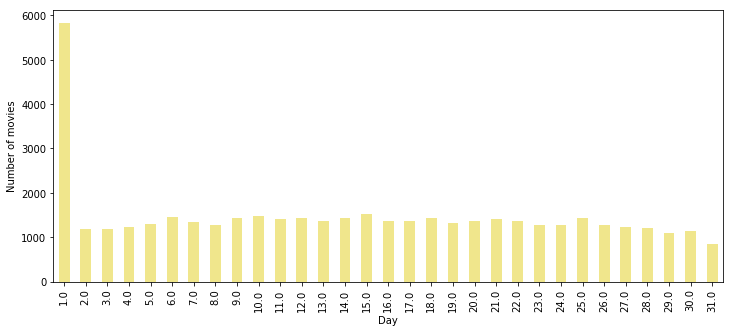

In [25]:
plt.figure(figsize=(12,5))
df['release_date'].dt.day.value_counts().sort_index().plot.bar(color='khaki')
plt.xlabel('Day')
plt.ylabel('Number of movies')
plt.show()

_**French, Italian, and Japanese** are the second, third and forth languages._

Total number of moview in English are: 45430


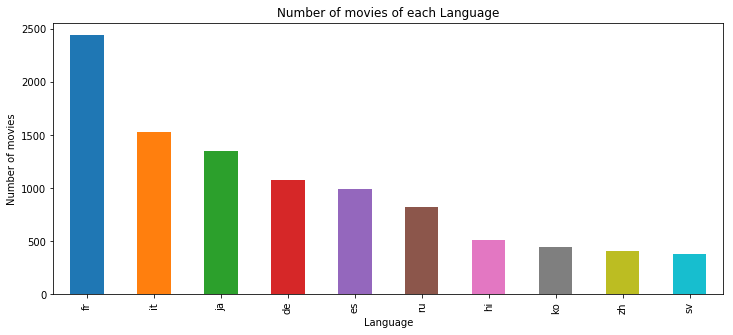

In [26]:
print('Total number of moview in English are:',len(df['original_language']=='en'))

plt.figure(figsize=(12,5))
df[df['original_language']!='en']['original_language'].value_counts().head(10).plot(kind='bar')
plt.xlabel('Language')
plt.ylabel('Number of movies')
plt.title('Number of movies of each Language')
plt.show() #except En

### Correlation
- Budget and revenue are 77% correlated.
- Budget and vote_count are around 67% correlated.
- popularity and revenue are 50% correlated.
- popularity and vote_count are 56% correlated.
- Revenue and vote_count are 81% correlated.

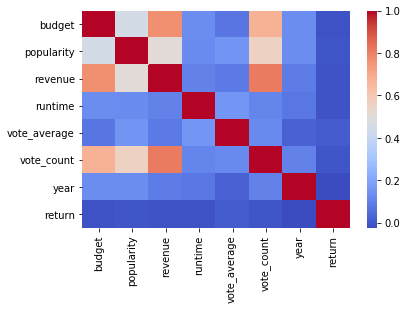

,budget,popularity,revenue,runtime,vote_average,vote_count,year,return
budget,1.000000,0.449682,0.768825,0.134700,0.073496,0.676699,0.131647,-0.012572
popularity,0.449682,1.000000,0.506221,0.129912,0.154357,0.559995,0.131634,-0.003946
revenue,0.768825,0.506221,1.000000,0.103948,0.083883,0.812031,0.088358,-0.005515
runtime,0.134700,0.129912,0.103948,1.000000,0.158192,0.113555,0.078714,-0.005189
vote_average,0.073496,0.154357,0.083883,0.158192,1.000000,0.123611,0.025829,0.013161
vote_count,0.676699,0.559995,0.812031,0.113555,0.123611,1.000000,0.106797,-0.003041
year,0.131647,0.131634,0.088358,0.078714,0.025829,0.106797,1.000000,-0.024818
return,-0.012572,-0.003946,-0.005515,-0.005189,0.013161,-0.003041,-0.024818,1.000000


In [27]:
sns.heatmap(df.corr(),cmap='coolwarm')
plt.show() #correlation 
df.corr()

 ## Title and Overview Wordclouds
There are certain words that use more often in titles and overviews. I use WordCloud library to find out what are these words.

The word **Love** is the most commonly used word in movie titles. **Girl**, **Day** and **Man** are also among the most commonly occuring words. 

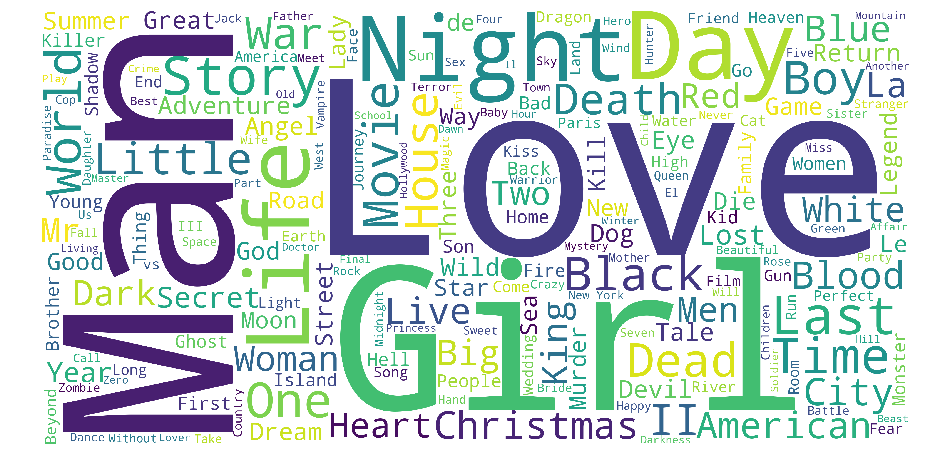

In [28]:
df['title'] = df['title'].astype('str')
df['overview'] = df['overview'].astype('str')

title_corpus = ' '.join(df['title'])
overview_corpus = ' '.join(df['overview'])

title_wordcloud = WordCloud(stopwords=STOPWORDS, background_color='white', height=2000, width=4000).generate(title_corpus)
plt.figure(figsize=(16,8))
plt.imshow(title_wordcloud)
plt.axis('off')
plt.show()

**Life** is the most commonly used word in Movie titles. **One** and **Find** are also popular.

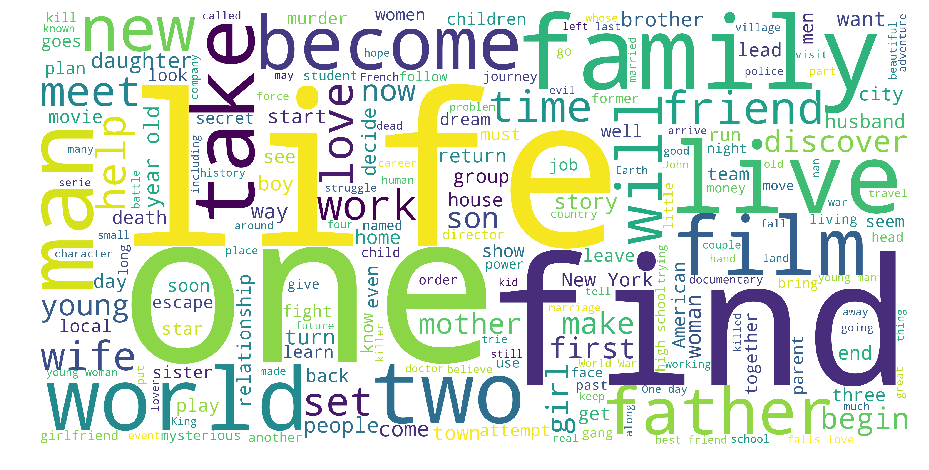

In [32]:
overview_wordcloud = WordCloud(stopwords=STOPWORDS, background_color='white', height=2000, width=4000).generate(overview_corpus)
plt.figure(figsize=(16,8))
plt.imshow(overview_wordcloud)
plt.axis('off')
plt.show()

# Statistics



### Popularity

The Popularity score seems to be an extremely skewed quentity with a mean of only 2.9 but maximum values reaching as high as 547, which is almost 1800% greater than the mean. However, as can be seen from the distribution plot, almost all movies have a popularity score less than 10 (the 75th percentile is at 3.678902).

**Minions** is the most popular movie by the TMDB Popularity Score. __Wonder Woman__ and __Beauty and the Beast__, two extremely successful woman centric movies come in second and third respectively.

Statistics about Popularity
count    45430.000000
mean         2.921206
std          6.006708
min          0.000000
25%          0.385872
50%          1.127238
75%          3.678128
max        547.488298
Name: popularity, dtype: float64
 


C:\Python\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


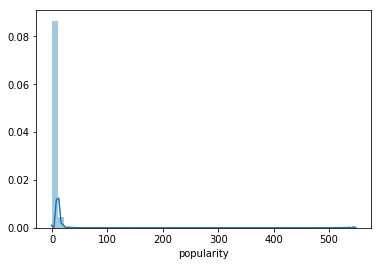

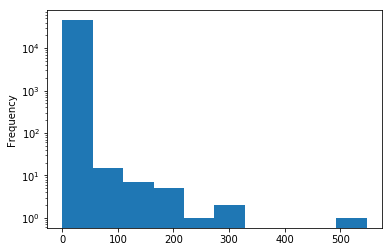

,title,popularity,year
30700,Minions,547.488298,2015.0
33356,Wonder Woman,294.337037,2017.0
42222,Beauty and the Beast,287.253654,2017.0
43644,Baby Driver,228.032744,2017.0
24455,Big Hero 6,213.849907,2014.0
26564,Deadpool,187.860492,2016.0
26566,Guardians of the Galaxy Vol. 2,185.330992,2017.0
14551,Avatar,185.070892,2009.0
24351,John Wick,183.870374,2014.0
23675,Gone Girl,154.801009,2014.0


In [33]:
print('Statistics about Popularity')
print(df.popularity.describe())
print(' ')

sns.distplot(df['popularity'].fillna(df['popularity'].median()))
plt.show()


df['popularity'].plot(logy=True, kind='hist')
plt.show()


df[['title', 'popularity', 'year']].sort_values('popularity', ascending=False).head(10)

### Vote average 
The mean rating is only a 5.6 on a scale of 10. Half the movies have a rating of less than or equal to 6. 

Statistics about vote_avg
count    42435.000000
mean         6.014863
std          1.256372
min          0.500000
25%          5.300000
50%          6.100000
75%          6.900000
max         10.000000
Name: vote_average, dtype: float64
 


C:\Python\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


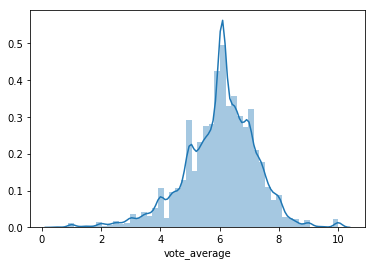

In [34]:
df['vote_average'] = df['vote_average'].replace(0, np.nan)

print('Statistics about vote_avg')
print(df.vote_average.describe())
print(' ')


sns.distplot(df['vote_average'].fillna(df['vote_average'].median()))
plt.show()


### Revenue

The revenue statistics for movies with more than 2000 votes. The distribution plot is skewed to the right.


Statistics about Revenue
count    5.120000e+02
mean     4.139510e+08
std      3.354796e+08
min      1.000000e+06
25%      1.705235e+08
50%      3.347582e+08
75%      5.851754e+08
max      2.787965e+09
Name: revenue, dtype: float64


C:\Python\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


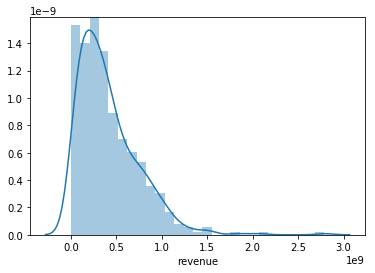

In [35]:
print('Statistics about Revenue')
print(df[df['vote_count']>2000]['revenue'].describe())

sns.distplot(df[df['vote_count']>2000]['revenue'].fillna(df['revenue'].median()))
plt.show()

### Runtime

The average length of a movie is about 1 hour and 30 minutes. The longest movie on record in this dataset is a staggering 1256 minutes (or 20 hours) long.

Statistics about Runtime
count    45430.000000
mean        94.129254
std         38.306780
min          0.000000
25%         85.000000
50%         95.000000
75%        107.000000
max       1256.000000
Name: runtime, dtype: float64


C:\Python\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


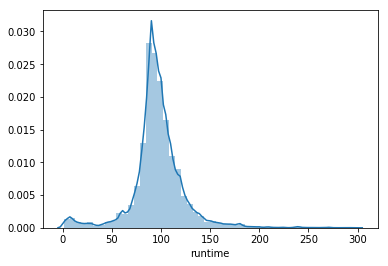

In [36]:
print('Statistics about Runtime')
print(df['runtime'].fillna(df['runtime'].median()).describe())

sns.distplot(df[(df['runtime']<300)&(df['runtime']>0)]['runtime'].fillna(df['runtime'].median()))
plt.show()

#### Shortest  and longest movies


* We can see there is several one minute lenght movies.

* All these long time films are TV series and we dont have acceess to the runtime of each episode in this dataset.

In [37]:
df[df['runtime'] > 0][['runtime', 'title', 'year']].sort_values('runtime').head(10)

,runtime,title,year
41870,1.0,Mr. Edison at Work in His Chemical Laboratory,1897.0
44694,1.0,Grandma's Reading Glass,1900.0
44693,1.0,"What Happened on Twenty-Third Street, New York...",1901.0
37996,1.0,The Magician,1898.0
44672,1.0,Panorama pris d'un train en marche,1898.0
44669,1.0,"Divers at Work on the Wreck of the ""Maine""",1898.0
44668,1.0,After the Ball,1897.0
44665,1.0,Between Calais and Dover,1897.0
44655,1.0,The Surrender of Tournavos,1897.0
19138,1.0,Blacksmith Scene,1893.0


In [38]:
df[df['runtime'] > 0][['runtime', 'title', 'year']].sort_values('runtime',ascending=False).head(10)

,runtime,title,year
24178,1256.0,Centennial,1978.0
19965,1140.0,Jazz,2001.0
40938,1140.0,Baseball,1994.0
13767,931.0,Berlin Alexanderplatz,1980.0
13953,925.0,Heimat: A Chronicle of Germany,1984.0
27855,900.0,The Story of Film: An Odyssey,2011.0
26682,877.0,Taken,2002.0
19158,874.0,The War,2007.0
34667,840.0,The Roosevelts: An Intimate History,2014.0
34732,840.0,Seventeen Moments in Spring,1973.0


### Budget


The distribution of movie budgets shows an exponential decay. More than 75% of the movies have a budget smaller than 25 million dollars.

count    4.543000e+04
mean     4.224828e+06
std      1.742853e+07
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      3.800000e+08
Name: budget, dtype: float64


C:\Python\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


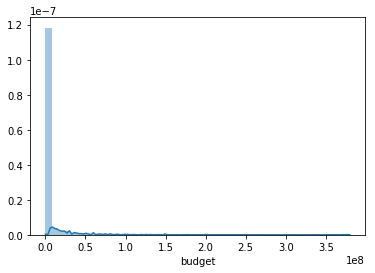

In [39]:
print(df['budget'].describe())

sns.distplot(df[df['budget'].notnull()]['budget'])


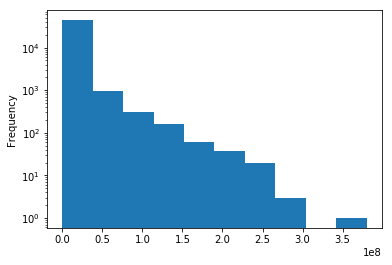

In [40]:
df['budget'].plot(logy=True, kind='hist')
plt.show()